In [1]:
%matplotlib inline
import numpy as np
import lsst.sims.utils as utils
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.plots as plots

In [6]:
# Set up the database connection
opsdb = db.OpsimDatabase('/Users/yoachim/Scratch/Opsim_sqlites/opsim3_61_sqlite.db',defaultdbTables=None, dbTables={'Summary':['Summary', 'obsHistID']})
outDir = 'null'
resultsDb = db.ResultsDb(outDir=outDir)
sql = 'filter="r"' 
slicer = slicers.HealpixSlicer(nside=64, lonCol='azimuth', latCol='zenithDistance')
metric = metrics.CountMetric('expMJD', metricName='NVisits Alt/Az')
plotDict = {}
plotFunc = plots.LambertSkyMap()
bundleList = [metricBundles.MetricBundle(metric,slicer,sql, plotFuncs=[plotFunc], plotDict=plotDict)]
bundleDict = metricBundles.makeBundlesDictFromList(bundleList)
bgroup = metricBundles.MetricBundleGroup(bundleDict, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()


Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Querying database with constraint filter="r"
Found 511487 visits
Running:  ['opsim_NVisits_Alt_Az_r_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


/Users/yoachim/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/matplotlib/tri/triangulation.py:110: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  self._neighbors)
/Users/yoachim/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


Plotting figures with filter="r" sqlconstraint now.
Plotting complete.


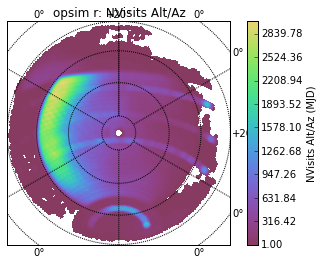

In [7]:
bgroup.plotAll(closefigs=False)